In [8]:
import json
import numpy as np
import matplotlib.pyplot as plt

### 1. Datenpunkt einlesen und erste simple Visualisierungen durchführen

In [2]:
f = open('../data/demodata_1.json')
data = json.load(f)
f.close()

In [5]:
type(data)

list

In [15]:
accelDataNumpy = np.asarray(data)

In [23]:
accelDataNumpy[:,0]

array([ 2.2, -1.1, -1.1, -0.2, -0.4, -0.1,  0.6,  0.9,  0.2, -0.5, -0.6,
        0.5,  0.9, -1.6, -0.8, -0.1, -0.8,  0. ,  0.6,  1.4,  1.1,  0.4,
       -0.9, -1.3, -0.1,  1. , -1.8, -0.6, -0.1,  0.1,  0.3,  0.9,  1.7,
        1.3,  0.8, -0.4, -0.4,  1.8,  1.7, -0.3, -0.1, -0.5, -0.3,  0. ,
        0.7,  1. ,  0.5, -0.3, -0.7,  0.8,  1.9, -0.4, -0.9, -0.3, -0.8,
       -0.2,  0.9,  1.3,  1. ,  0.6, -0.2, -1.2,  0.5,  1.6, -1.2, -0.8,
       -0.4, -0.5,  0. ,  0.7,  1.3,  0.9, -0.2, -1. , -0.9,  0.7, -0.7,
       -1.2, -0.2, -0.2,  0.2,  0.4,  1.3,  1.3,  0.7, -0.4, -0.6,  1.7,
        3.6, -0.7, -1.2, -0.3, -0.3, -0.4, -0.7, -0.5, -0.2, -0.5, -0.4,
        0.7, -0.9, -2.1, -1. , -0.2,  0. ,  0.6,  1.5,  1.1,  0.6, -0.3,
       -0.5,  0.8,  1.7, -1.1, -0.2, -0.6, -0.8, -0.1,  0.7,  1.2,  0.8,
        0.4,  1. ,  0.9,  1.1,  3.1, -0.8, -1.4, -0.5,  0.8,  1.4,  0.7,
        0.2,  0.4, -1. , -2.3, -0.9,  1.2,  1.9, -1.5, -3.2, -1.1,  0.3,
        0.9,  0.9,  0.2, -0.2,  0.2,  1.4,  2.1])

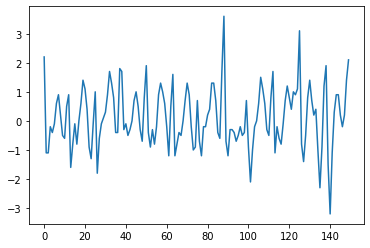

In [24]:
plt.plot(accelDataNumpy[:,0])

{'whiskers': [<matplotlib.lines.Line2D at 0x193d95ca4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x193d95cac10>,
 'boxes': [<matplotlib.lines.Line2D at 0x193d95ca130>],
 'medians': [<matplotlib.lines.Line2D at 0x193d95d9370>],
 'fliers': [<matplotlib.lines.Line2D at 0x193d95d9700>],
 'means': []}

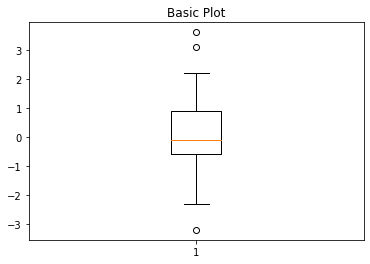

In [25]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(accelDataNumpy[:,0])

In [35]:
lowerQuantile = np.quantile(accelDataNumpy[:,0],0.25)
print(lowerQuantile)

-0.5750000000000001


In [36]:
upperQuantile = np.quantile(accelDataNumpy[:,0],0.75)
print(upperQuantile)

0.875


In [37]:
IQR = abs(upperQuantile - lowerQuantile)
print(IQR)

1.4500000000000002


In [38]:
upperBoundary = upperQuantile +  IQR
print(upperBoundary)

2.325


In [39]:
lowerBoundary = lowerQuantile - IQR
print(lowerBoundary)

-2.0250000000000004


In [47]:
accelDataNumpySmoothed = np.copy(accelDataNumpy)

In [50]:
for idx, value in enumerate(accelDataNumpySmoothed[:,0]):
    if(value > upperBoundary):
        accelDataNumpySmoothed[:,0][idx] = upperQuantile
    if(value < lowerBoundary):
        accelDataNumpySmoothed[:,0][idx] = lowerQuantile
print("finished: removal of outliers")
    

finished: removal of outliers


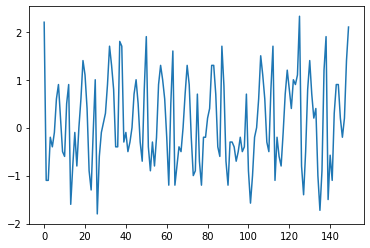

In [51]:
plt.plot(accelDataNumpySmoothed[:,0])

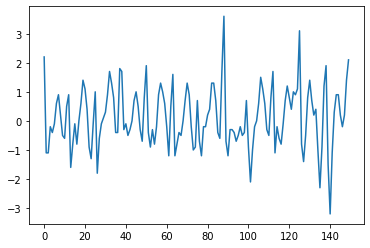

In [52]:
plt.plot(accelDataNumpy[:,0])